In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [13]:
!pip install openpyxl



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
df = pd.read_excel(r"C:\Users\vikas madan singh\Downloads\TCS_EDA.xlsx")

In [12]:
df.head()

,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6
0,CUST0001,56,165580.0,398.0,0.390502,3.0,0.0,16310,0.317396,EMP,18.0,Student,Los Angeles,Late,Late,Missed,Late,Missed,Late
1,CUST0002,69,100999.0,493.0,0.312444,6.0,1.0,17401,0.196093,Self-employed,0.0,Standard,Phoenix,Missed,Missed,Late,Missed,On-time,On-time
2,CUST0003,46,188416.0,500.0,0.35993,0.0,0.0,13761,0.301655,Self-employed,1.0,Platinum,Chicago,Missed,Late,Late,On-time,Missed,Late
3,CUST0004,32,101672.0,413.0,0.3714,3.0,0.0,88778,0.264794,Unemployed,15.0,Platinum,Phoenix,Late,Missed,Late,Missed,Late,Late
4,CUST0005,60,38524.0,487.0,0.234716,2.0,0.0,13316,0.510583,Self-employed,11.0,Standard,Phoenix,Missed,On-time,Missed,Late,Late,Late


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_ID           500 non-null    object 
 1   Age                   502 non-null    object 
 2   Income                502 non-null    float64
 3   Credit_Score          500 non-null    float64
 4   Credit_Utilization    501 non-null    object 
 5   Missed_Payments       501 non-null    float64
 6   Delinquent_Account    500 non-null    float64
 7   Loan_Balance          501 non-null    object 
 8   Debt_to_Income_Ratio  501 non-null    float64
 9   Employment_Status     500 non-null    object 
 10  Account_Tenure        500 non-null    float64
 11  Credit_Card_Type      500 non-null    object 
 12  Location              500 non-null    object 
 13  Month_1               500 non-null    object 
 14  Month_2               500 non-null    object 
 15  Month_3               5

In [15]:
df.describe()

,Income,Credit_Score,Missed_Payments,Delinquent_Account,Debt_to_Income_Ratio,Account_Tenure
count,502.000000,500.000000,501.000000,500.000000,501.000000,500.000000
mean,108106.476096,577.750000,4.131737,0.160000,91.667527,9.740000
std,51647.236602,168.543244,26.120463,0.366973,2045.107505,5.923054
min,0.000000,301.000000,0.000000,0.000000,0.100000,0.000000
25%,67555.500000,418.750000,1.000000,0.000000,0.233681,5.000000
50%,107658.000000,586.000000,3.000000,0.000000,0.301655,10.000000
75%,152326.000000,725.750000,5.000000,0.000000,0.363624,15.000000
max,199943.000000,847.000000,586.000000,1.000000,45776.000000,19.000000


In [16]:
df.columns

Index(['Customer_ID', 'Age', 'Income', 'Credit_Score', 'Credit_Utilization',
       'Missed_Payments', 'Delinquent_Account', 'Loan_Balance',
       'Debt_to_Income_Ratio', 'Employment_Status', 'Account_Tenure',
       'Credit_Card_Type', 'Location', 'Month_1', 'Month_2', 'Month_3',
       'Month_4', 'Month_5', 'Month_6'],
      dtype='object')

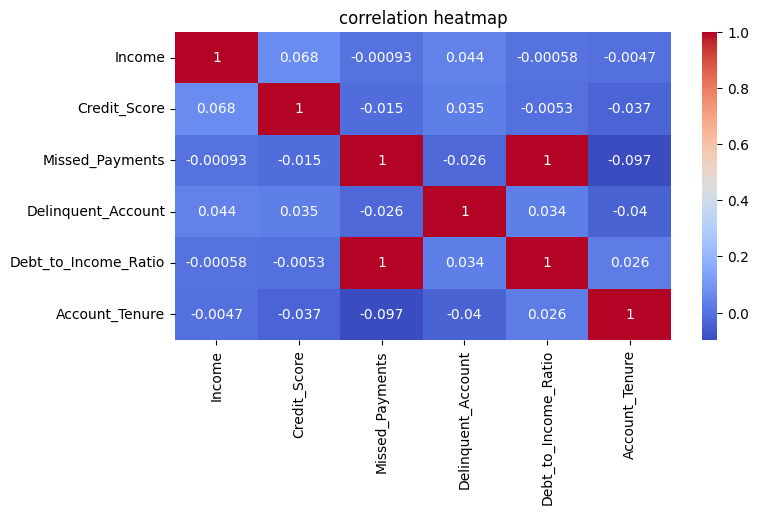

In [28]:
plt.figure(figsize=(8,4))
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(),annot = True, cmap = 'coolwarm')
plt.title("correlation heatmap")
plt.show()

### High-Risk Indicators for Delinquency Prediction

1. **Short Account Tenure**  
    Newer customers are more likely to miss payments, indicating a learning or stability curve.

2. **High Debt-to-Income Ratio**  
    Customers with more debt relative to income are slightly more prone to becoming delinquent.

3. **Low Income Levels**  
    Slight positive correlation with delinquency shows that lower-income groups are a bit more vulnerable.

4. **Past Missed Payments**  
    Though not strongly correlated numerically, previous missed payments are always red flags in risk modeling.

5. **Credit Score**  
    Very weak correlation here, but traditionally lower credit scores are considered risky.




In [39]:
df.select_dtypes(include='object').columns

Index(['Customer_ID', 'Age', 'Credit_Utilization', 'Loan_Balance',
       'Employment_Status', 'Credit_Card_Type', 'Location', 'Month_1',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6'],
      dtype='object')

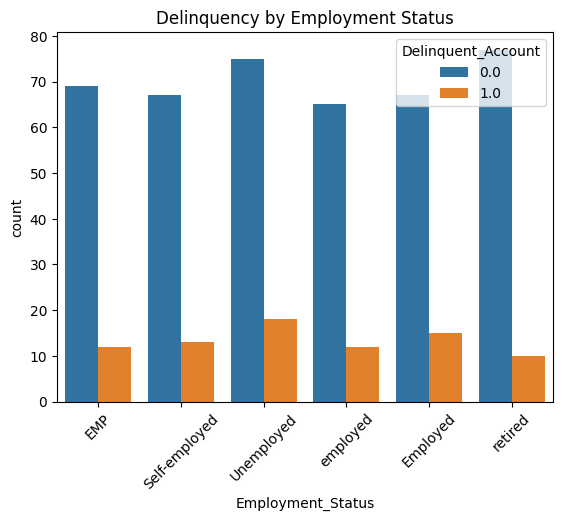

In [43]:
sns.countplot(x="Employment_Status",hue = "Delinquent_Account",data=df)
plt.title("Delinquency by Employment Status")
plt.xticks(rotation = 45)
plt.show()

###  Categorical Risk Indicators

- **Employment_Status:** Unemployed customers have higher delinquency rate.

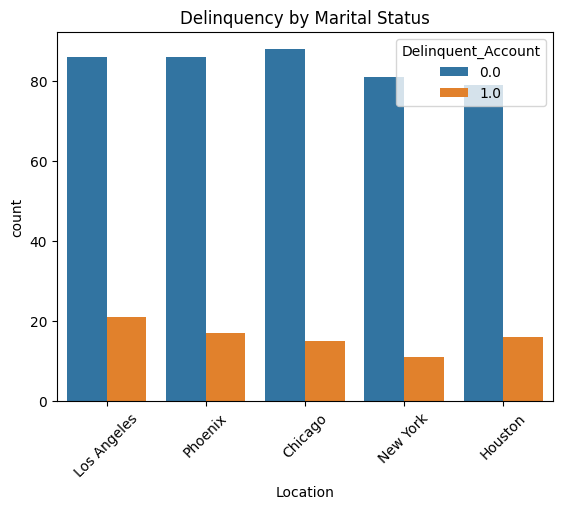

In [47]:
sns.countplot(x='Location', hue='Delinquent_Account', data=df)
plt.title("Delinquency by Marital Status")
plt.xticks(rotation=45)
plt.show()


### 🗺️ Location-based Risk Insights

- **Location:** Certain cities/regions show higher delinquency rates.
- This insight can help the business in location-based risk profiling or tighter credit checks in those regions.


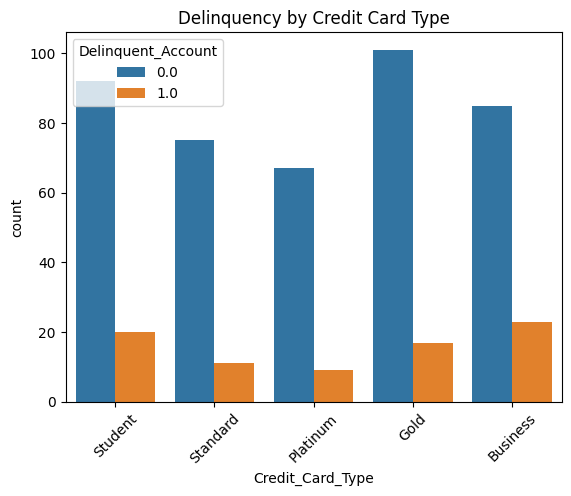

In [48]:
sns.countplot(x='Credit_Card_Type', hue='Delinquent_Account', data=df)
plt.title("Delinquency by Credit Card Type")
plt.xticks(rotation=45)
plt.show()


### 💳 Credit Card Type and Risk

- **Credit_Card_Type:** Customers using basic or classic credit cards show higher delinquency, indicating financial vulnerability.
- Premium card holders (like Gold/Platinum) have lower delinquency rates, suggesting better creditworthinesstype.
